# 1. Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")
print("Dimension of data Latih :",data_train.shape)
print("Dimension of data testing :",data_test.shape)

Dimension of data Latih : (1460, 81)
Dimension of data testing : (1459, 80)


In [3]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# 2. Handling Missing Data

In [5]:
data_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## type 1, remove column if missing value > 90%

In [6]:
data_train=data_train.drop(['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)

##  type 2, replace missing value with modus

In [7]:
print("modus of Electrical :",data_train["Electrical"].mode())
print("modus of LotFrontage :",data_train["LotFrontage"].mode())
print("modus of MasVnrType :",data_train["MasVnrType"].mode())
print("modus of MasVnrArea :",data_train["MasVnrArea"].mode())  
print("modus of BsmtQual :",data_train["BsmtQual"].mode())
print("modus of BsmtCond :",data_train["BsmtCond"].mode())
print("modus of BsmtExsposure :",data_train["BsmtExposure"].mode())
print("modus of BsmtType1 :",data_train["BsmtFinType1"].mode())
print("modus of BsmtFinSF1 :",data_train["BsmtFinSF1"].mode())
print("modus of BsmtFinType2 :",data_train["BsmtFinType2"].mode())
print("modus of GarageType :",data_train["GarageType"].mode())
print("modus of GarageYrBlt :",data_train["GarageYrBlt"].mode())
print("modus of GarageFinish :",data_train["GarageFinish"].mode())
print("modus of GarageQual :",data_train["GarageQual"].mode())
print("modus of GarageCond :",data_train["GarageCond"].mode())

modus of Electrical : 0    SBrkr
dtype: object
modus of LotFrontage : 0    60.0
dtype: float64
modus of MasVnrType : 0    None
dtype: object
modus of MasVnrArea : 0    0.0
dtype: float64
modus of BsmtQual : 0    TA
dtype: object
modus of BsmtCond : 0    TA
dtype: object
modus of BsmtExsposure : 0    No
dtype: object
modus of BsmtType1 : 0    Unf
dtype: object
modus of BsmtFinSF1 : 0    0
dtype: int64
modus of BsmtFinType2 : 0    Unf
dtype: object
modus of GarageType : 0    Attchd
dtype: object
modus of GarageYrBlt : 0    2005.0
dtype: float64
modus of GarageFinish : 0    Unf
dtype: object
modus of GarageQual : 0    TA
dtype: object
modus of GarageCond : 0    TA
dtype: object


In [8]:
data_train['Electrical'] = data_train['Electrical'].replace(np.nan, "SBrkr")
data_train["LotFrontage"] = data_train["LotFrontage"].replace(np.nan, 60.0)
data_train['MasVnrType'] = data_train['MasVnrType'].replace(np.nan, "None")
data_train['MasVnrArea'] = data_train['MasVnrArea'].replace(np.nan, 0.0)
data_train['BsmtQual'] = data_train['BsmtQual'].replace(np.nan, "TA")
data_train['BsmtCond'] = data_train['BsmtCond'].replace(np.nan, "TA")
data_train['BsmtExposure'] = data_train['BsmtExposure'].replace(np.nan, "No")
data_train['BsmtFinType1'] = data_train['BsmtFinType1'].replace(np.nan, "Unf")
data_train['BsmtFinSF1'] = data_train['BsmtFinSF1'].replace(np.nan, 0)
data_train['BsmtFinType2'] = data_train['BsmtFinType2'].replace(np.nan, "Unf")
data_train['GarageType'] = data_train['GarageType'].replace(np.nan, "Attchd")
data_train['GarageYrBlt'] = data_train['GarageYrBlt'].replace(np.nan, 2005.0)
data_train['GarageFinish'] = data_train['GarageFinish'].replace(np.nan, "Unf")
data_train['GarageQual'] = data_train['GarageQual'].replace(np.nan, "TA")
data_train['GarageCond'] = data_train['GarageCond'].replace(np.nan, "TA")

In [9]:
data_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

# 3. Visualization Data

In [10]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


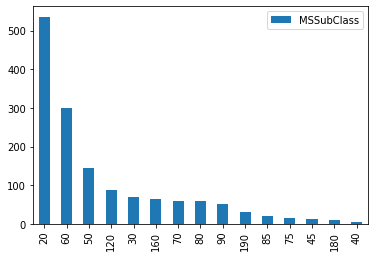

In [11]:
data_train_MSSubClass=data_train.MSSubClass.value_counts()
plot_MSSubClass=pd.DataFrame(data_train_MSSubClass)
plot_MSSubClass.plot.bar(y="MSSubClass")
plt.legend()

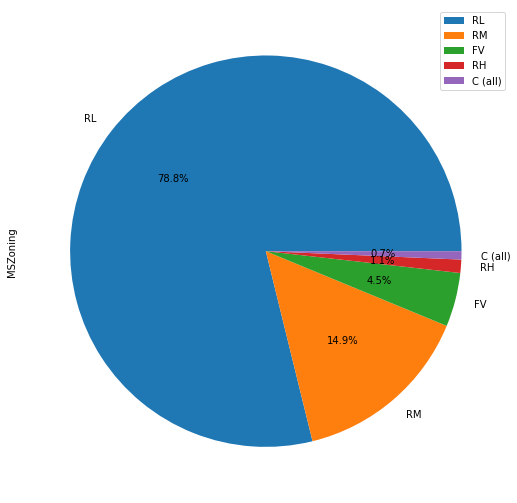

In [12]:
data_train_MSZoning=data_train.MSZoning.value_counts()
plot_MSZoning=pd.DataFrame(data_train_MSZoning)
plot_MSZoning.plot.pie(y="MSZoning",figsize=(9,9),autopct='%1.1f%%')
plt.legend()

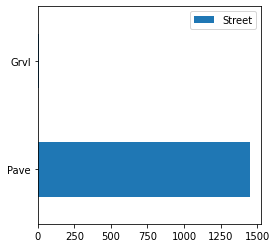

In [13]:
street=data_train.Street.value_counts()
street=pd.DataFrame(street)
plot=street.plot.barh(y='Street',figsize=(4,4))
plt.legend()

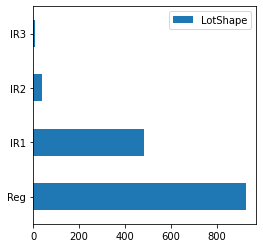

In [14]:
lotshape=data_train.LotShape.value_counts()
lotshape=pd.DataFrame(lotshape)
plot=lotshape.plot.barh(y='LotShape',figsize=(4,4))
plt.legend()

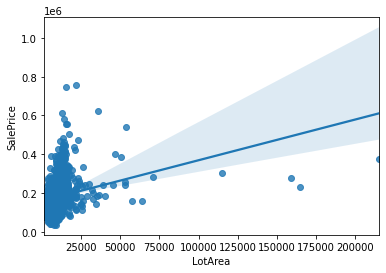

In [15]:
sns.regplot(x="LotArea", y="SalePrice", data=data_train);

In [16]:
data = {'Jumlah': [314,329,304,338,175],}
year = pd.DataFrame(data, index=[2006,2007,2008,2009,2010])

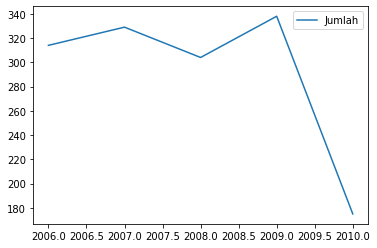

In [17]:
plot_year=year.plot.line()

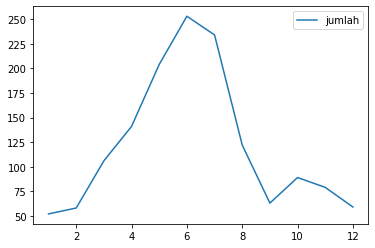

In [18]:
data={'jumlah':[52,58,106,141,204,253,234,122,63,89,79,59]}
month=pd.DataFrame(data,index=[1,2,3,4,5,6,7,8,9,10,11,12])
plot_month=month.plot.line()

# 4. Categorical Data using Label Encoder

In [19]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [20]:
le = LabelEncoder()
data_train['MSZoning'] = le.fit_transform(data_train['MSZoning'])
data_train['Street'] = le.fit_transform(data_train['Street'])
data_train['LotShape'] = le.fit_transform(data_train['LotShape'])
data_train['LandContour'] = le.fit_transform(data_train['LandContour'])
data_train['Utilities'] = le.fit_transform(data_train['Utilities'])
data_train['LotConfig'] = le.fit_transform(data_train['LotConfig'])
data_train['LandSlope'] = le.fit_transform(data_train['LandSlope'])
data_train['Neighborhood'] = le.fit_transform(data_train['Neighborhood'])
data_train['Condition1'] = le.fit_transform(data_train['Condition1'])
data_train['Condition2'] = le.fit_transform(data_train['Condition2'])
data_train['BldgType'] = le.fit_transform(data_train['BldgType'])
data_train['HouseStyle'] = le.fit_transform(data_train['HouseStyle'])
data_train['RoofStyle'] = le.fit_transform(data_train['RoofStyle'])
data_train['RoofMatl'] = le.fit_transform(data_train['RoofMatl'])
data_train['Exterior1st'] = le.fit_transform(data_train['Exterior1st'])
data_train['Exterior2nd'] = le.fit_transform(data_train['Exterior2nd'])
data_train['MasVnrType'] = le.fit_transform(data_train['MasVnrType'])
data_train['ExterQual'] = le.fit_transform(data_train['ExterQual'])
data_train['ExterCond'] = le.fit_transform(data_train['ExterCond'])
data_train['Foundation'] = le.fit_transform(data_train['Foundation'])
data_train['BsmtQual'] = le.fit_transform(data_train['BsmtQual'])
data_train['BsmtCond'] = le.fit_transform(data_train['BsmtCond'])
data_train['BsmtExposure'] = le.fit_transform(data_train['BsmtExposure'])
data_train['BsmtFinType1'] = le.fit_transform(data_train['BsmtFinType1'])
data_train['BsmtFinType2 '] = le.fit_transform(data_train['BsmtFinType2'])
data_train['Heating '] = le.fit_transform(data_train['Heating'])
data_train['HeatingQC'] = le.fit_transform(data_train['HeatingQC'])
data_train['CentralAir'] = le.fit_transform(data_train['CentralAir'])
data_train['Electrical'] = le.fit_transform(data_train['Electrical'])
data_train['KitchenQual'] = le.fit_transform(data_train['KitchenQual'])
data_train['Functional'] = le.fit_transform(data_train['Functional'])
data_train['GarageType'] = le.fit_transform(data_train['GarageType'])
data_train['GarageFinish'] = le.fit_transform(data_train['GarageFinish'])
data_train['GarageQual'] = le.fit_transform(data_train['GarageQual'])
data_train['GarageCond'] = le.fit_transform(data_train['GarageCond'])
data_train['PavedDrive'] = le.fit_transform(data_train['PavedDrive'])
data_train['SaleType'] = le.fit_transform(data_train['SaleType'])
data_train['BsmtFinType2'] = le.fit_transform(data_train['BsmtFinType2'])
data_train['Heating'] = le.fit_transform(data_train['Heating'])
data_train['SaleCondition'] = le.fit_transform(data_train['SaleCondition'])


In [21]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtFinType2,Heating
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,2,2008,8,4,208500,5,1
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,5,2007,8,4,181500,5,1
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,9,2008,8,4,223500,5,1
3,4,70,3,60.0,9550,1,0,3,0,0,...,0,0,0,2,2006,8,0,140000,5,1
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,12,2008,8,4,250000,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,0,0,0,8,2007,8,4,175000,5,1
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,0,0,0,2,2010,8,4,210000,4,1
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,0,0,2500,5,2010,8,4,266500,5,1
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,0,0,0,4,2010,8,4,142125,4,1


## 5. Modelling Prediction with SVM RBF

In [22]:
from sklearn.svm import SVR
feature=data_train.drop(['SalePrice'], axis=1)
X = feature.values
Y = data_train[["SalePrice"]].values.ravel()

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X = sc.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [25]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, Y_train)

SVR()

In [26]:
prediction = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
mean_squared_error(Y_test, prediction)

7243609545.746125

# 6. Prediction using test.csv

In [27]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [28]:
data_test=data_test.drop(['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)

In [29]:
data_test['Electrical'] = data_test['Electrical'].replace(np.nan, "SBrkr")
data_test["LotFrontage"] = data_test["LotFrontage"].replace(np.nan, 60.0)
data_test['MasVnrType'] = data_test['MasVnrType'].replace(np.nan, "None")
data_test['MasVnrArea'] = data_test['MasVnrArea'].replace(np.nan, 0.0)
data_test['BsmtQual'] = data_test['BsmtQual'].replace(np.nan, "TA")
data_test['BsmtCond'] = data_test['BsmtCond'].replace(np.nan, "TA")
data_test['BsmtExposure'] = data_test['BsmtExposure'].replace(np.nan, "No")
data_test['BsmtFinType1'] = data_test['BsmtFinType1'].replace(np.nan, "Unf")
data_test['BsmtFinSF1'] = data_test['BsmtFinSF1'].replace(np.nan, 0)
data_test['BsmtFinType2'] = data_test['BsmtFinType2'].replace(np.nan, "Unf")
data_test['GarageType'] = data_test['GarageType'].replace(np.nan, "Attchd")
data_test['GarageYrBlt'] = data_test['GarageYrBlt'].replace(np.nan, 2005.0)
data_test['GarageFinish'] = data_test['GarageFinish'].replace(np.nan, "Unf")
data_test['GarageQual'] = data_test['GarageQual'].replace(np.nan, "TA")
data_test['GarageCond'] = data_test['GarageCond'].replace(np.nan, "TA")

In [30]:
data_test['MSZoning'] = le.fit_transform(data_test['MSZoning'])
data_test['Street'] = le.fit_transform(data_test['Street'])
data_test['LotShape'] = le.fit_transform(data_test['LotShape'])
data_test['LandContour'] = le.fit_transform(data_test['LandContour'])
data_test['Utilities'] = le.fit_transform(data_test['Utilities'])
data_test['LotConfig'] = le.fit_transform(data_test['LotConfig'])
data_test['LandSlope'] = le.fit_transform(data_test['LandSlope'])
data_test['Neighborhood'] = le.fit_transform(data_test['Neighborhood'])
data_test['Condition1'] = le.fit_transform(data_test['Condition1'])
data_test['Condition2'] = le.fit_transform(data_test['Condition2'])
data_test['BldgType'] = le.fit_transform(data_test['BldgType'])
data_test['HouseStyle'] = le.fit_transform(data_test['HouseStyle'])
data_test['RoofStyle'] = le.fit_transform(data_test['RoofStyle'])
data_test['RoofMatl'] = le.fit_transform(data_test['RoofMatl'])
data_test['Exterior1st'] = le.fit_transform(data_test['Exterior1st'])
data_test['Exterior2nd'] = le.fit_transform(data_test['Exterior2nd'])
data_test['MasVnrType'] = le.fit_transform(data_test['MasVnrType'])
data_test['ExterQual'] = le.fit_transform(data_test['ExterQual'])
data_test['ExterCond'] = le.fit_transform(data_test['ExterCond'])
data_test['Foundation'] = le.fit_transform(data_test['Foundation'])
data_test['BsmtQual'] = le.fit_transform(data_test['BsmtQual'])
data_test['BsmtCond'] = le.fit_transform(data_test['BsmtCond'])
data_test['BsmtExposure'] = le.fit_transform(data_test['BsmtExposure'])
data_test['BsmtFinType1'] = le.fit_transform(data_test['BsmtFinType1'])
data_test['BsmtFinType2 '] = le.fit_transform(data_test['BsmtFinType2'])
data_test['Heating '] = le.fit_transform(data_test['Heating'])
data_test['HeatingQC'] = le.fit_transform(data_test['HeatingQC'])
data_test['CentralAir'] = le.fit_transform(data_test['CentralAir'])
data_test['Electrical'] = le.fit_transform(data_test['Electrical'])
data_test['KitchenQual'] = le.fit_transform(data_test['KitchenQual'])
data_test['Functional'] = le.fit_transform(data_test['Functional'])
data_test['GarageType'] = le.fit_transform(data_test['GarageType'])
data_test['GarageFinish'] = le.fit_transform(data_test['GarageFinish'])
data_test['GarageQual'] = le.fit_transform(data_test['GarageQual'])
data_test['GarageCond'] = le.fit_transform(data_test['GarageCond'])
data_test['PavedDrive'] = le.fit_transform(data_test['PavedDrive'])
data_test['SaleType'] = le.fit_transform(data_test['SaleType'])
data_test['SaleCondition'] = le.fit_transform(data_test['SaleCondition'])
data_test['BsmtFinType2'] = le.fit_transform(data_test['BsmtFinType2'])
data_test['Heating'] = le.fit_transform(data_test['Heating'])
data_test = data_test.fillna(0)

In [31]:
testing = data_test.values 
testing = sc.fit_transform(testing)
prediction = regressor.predict(testing)

In [32]:
data_test=data_test.reset_index()
test=data_test[["Id"]]
prediction=pd.DataFrame(prediction,columns=["SalePrice"])
result=pd.concat([test["Id"],prediction["SalePrice"]],axis=1)
result.to_csv("Submission.csv",index=False)

## 7. Result Submissions

In [33]:
result

,Id,SalePrice
0,1461,164860.994567
1,1462,164891.082427
2,1463,164955.222149
3,1464,164966.441355
4,1465,164940.978544
...,...,...
1454,2915,164871.623852
1455,2916,164857.711116
1456,2917,164889.198740
1457,2918,164891.815466
